In [8]:
!pip3 install timm


  Using cached timm-1.0.9-py3-none-any.whl.metadata (42 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 2.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.5/381.5 kB 1.2 MB/s eta 0:00:00a 0:00:01
Using cached tqdm-4.66.5-py3-none-any.whl (78 kB)

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [82]:
import cv2
import os
import torch
import urllib.request
import matplotlib.pyplot as plt
import numpy as np

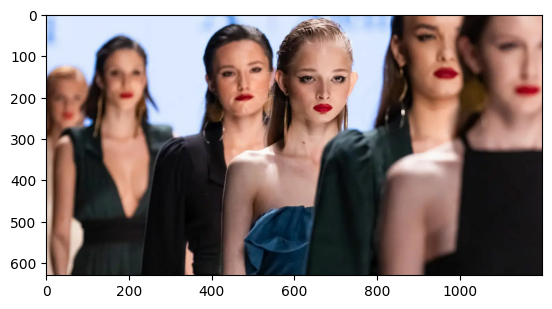

In [71]:
img_path = 'content/moscow-fashion-week.png'
img = plt.imread(img_path)
plt.imshow(img)
plt.show()

In [72]:
model_type = "DPT_Large"

In [15]:
midas = torch.hub.load("intel-isl/MiDaS", model_type)

Using cache found in /Users/pranamshetty/.cache/torch/hub/intel-isl_MiDaS_master
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v3/dpt_large_384.pt" to /Users/pranamshetty/.cache/torch/hub/checkpoints/dpt_large_384.pt
100.0%


In [16]:
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")

In [41]:
print(device)

cpu


In [74]:
# rm ~/.cache/torch/hub/checkpoints/dpt_large_384.pt
midas.to(device)
midas.eval()

DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_featur

In [75]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
if model_type == "DPT_Large":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /Users/pranamshetty/.cache/torch/hub/intel-isl_MiDaS_master


In [76]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
input_batch = transform(img).to(device)


In [77]:
with torch.no_grad():
    prediction = midas(input_batch)
    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
    size = img.shape[:2],
    mode = "bilinear",
    align_corners = False,
    ).squeeze()
output = prediction.cpu().numpy()

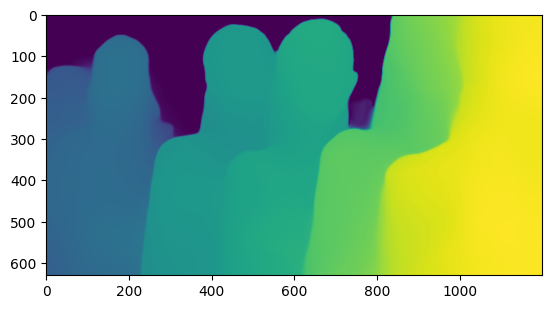

In [78]:
plt.imshow(output)

In [85]:
#as i am using apple silicon, the bicubic mode is not supported on gpu so shifting the load to cpu here and using a different img
import os
from matplotlib import cm
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
# device = "cpu" #bicubic doesnt work for Apple Silicon

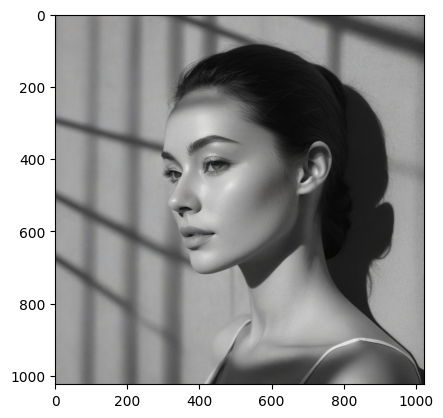

In [48]:
#IMG 2
img_path_2 = "content/model_insta.jpeg"
img2 = plt.imread(img_path_2)
plt.imshow(img2)

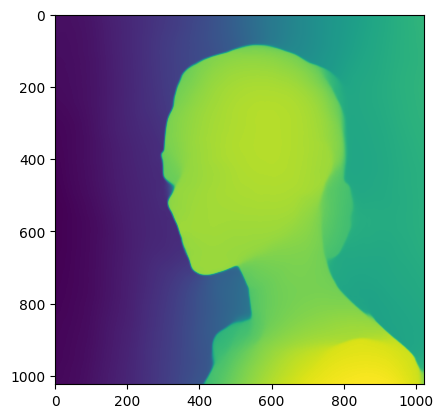

In [62]:
with torch.no_grad():
    prediction = midas(input_batch)
    prediction = torch.nn.functional.interpolate(
    prediction.unsqueeze(1),
    size = img.shape[:2],
    mode = "bicubic",
    align_corners = False,
    ).squeeze()
output2 = prediction.cpu().numpy()
plt.imshow(output)
    